# Lab 2. Discrete Random Numbers

Probability and Statistics, Spring 2016   

[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/3.0/), Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences   

Based on documentation of random numbers

https://docs.python.org/2/library/random.html#random.getrandbits

http://docs.scipy.org/doc/numpy/reference/routines.random.html 

We start by reading the most important libraries to Python.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For Python 2.7 users to make the code compatible with 3.X take the comment away
# from __future__ import print_function, division

Random library contains the common random generators.

In [84]:
import numpy.random as rnd

Integer valued random numbers can be generated with function `randint(N)`, where `N` gives the upper limit of the numbers. For example `rnd.randint(10)` generates a random integer between 0 and 9.

In [85]:
rnd.randint(10)

0

We can generate several random numbers using a for loop.

In [86]:
for i in range(10):
    print(rnd.randint(10), " ", end=" ")

9   4   0   1   2   9   8   6   0   4   

Or creating a list.

In [87]:
x = [rnd.randint(10) for i in range(10)]
x

[3, 2, 0, 5, 1, 3, 6, 6, 4, 0]

Most efficient is to create arrays. Then you need to specify the `low`, `high`, and `size` parameters for `randint()` function.

In [88]:
low = 0
high = 10
size = 50
x = rnd.randint(low, high, size)
x

array([4, 2, 3, 4, 6, 5, 4, 4, 4, 7, 8, 4, 8, 1, 6, 7, 6, 9, 5, 2, 5, 9, 8,
       8, 7, 2, 2, 0, 9, 3, 2, 5, 6, 8, 5, 3, 0, 2, 9, 3, 8, 0, 9, 0, 4, 8,
       9, 5, 1, 2])

What if we want to count and display the frequency histogram of the generated values?

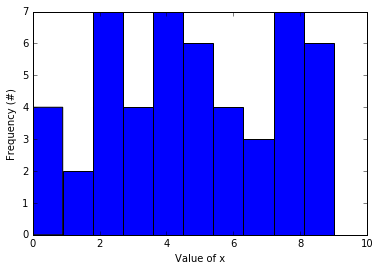

In [89]:
out = plt.hist(x)
plt.xlabel("Value of x")
plt.ylabel("Frequency (#)")

What's in the `out` variable?

In [90]:
out

(array([ 4.,  2.,  7.,  4.,  7.,  6.,  4.,  3.,  7.,  6.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

It contains two arrays: the first one has the counts and the second array the x-limits. 

Let's try different x-limits.

Frequencies =  [ 4.  2.  7.  4.  7.  6.  4.  3.  7.  6.  0.]
Limits for bins = [ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5]


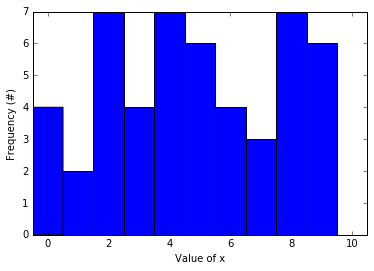

In [91]:
limits = np.arange(-0.5, 11, 1.0)
out = plt.hist(x, bins = limits)
plt.xlim([-0.5, 10.5])
plt.xlabel("Value of x")
plt.ylabel("Frequency (#)")
print("Frequencies = ", out[0]) # The frequencies
print("Limits for bins =", out[1]) # The bin limits

### Exercise 1. Histogram of random integers
Create an array of 1000 random integer numbers in range 0..20 and make a histogram plot of the distribution.

### Exercise 2. Flat histogram

Increase the number of random integers on previous exercises. Explore different values. Make graphs of the histograms and compare the histograms. How many random numbers are needed in order that the histogram looks flat and evenly distributed?

## Two-valued random numbers

In this second exercise we create two-valued random numbers.

In [92]:
rnd.choice(['A','B'])

'B'

Let's create a coin flipping experiment

In [93]:
N = 10
coin = rnd.choice(['head', 'tail'], N)
print(coin)

['head' 'tail' 'tail' 'tail' 'head' 'head' 'head' 'head' 'head' 'head']


Testing if the coin has value 'head'

In [94]:
coin == 'head'

array([ True, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

Now we can count how many 'head's we got.

In [95]:
np.sum(coin == 'head')

7

### Exercise 3. Coin flipping
If we flip the coin 100 times, how many times we get 'head'? Is it always the same number?

### Exercise 4. Repeated coin flipping

Run the 100 coin flipping experiment several times, lets say, repeat the experiment 1000 times. Count on each round how many times you got 'head' and store the sum of the heads into a new variable, Named this variable as `sum_of_heads`. Make a graph how the number of heads changes over the simulation iterations. What do you observe?

Tip. Use the code of previous exercise and add a for-loop around the simulation. Check the [Loops and if/else statements](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook3/py_exploratory_comp_3_sol.ipynb) for more details, if you feel uncertain how to use for-loop.

### Exercise 5. Statistics of coin flipping

Make a histogram of the sum of the heads of previous exercise. Explore and use suitable bins. How does the sum of heads histogram look like? Is it flat?

## Cumulative sum

If we have an array of numbers, we can calculate the cumulative sum of them using `np.cumsum` function.

In [96]:
x = np.array([1, 0, 2, 3, 1])
s = np.cumsum(x)
print(s)

[1 1 3 6 7]


In the first element of the results we have the value of the first element of input,  and in the following elements we add one-by-one the next value. As the final result the cumulative sum is calculated as:
> [1, (1 + 0), (1 + 0 + 2), (1 + 0 + 2 + 3), (1 + 0 + 2 + 3 + 1)] = [1 1 3 6 7]

What if we have True-False data in the input?

In [97]:
x = np.array([True, False, True, True, False])
s = np.cumsum(x)
print(s)

[1 1 2 3 3]


The cumsum counts each `True` value as `1` and `False` as `0`:
> [1, (1 + 0), (1 + 0 + 1), (1 + 0 + 1 + 1), (1 + 0 + 1 + 1 + 0)] = [1 1 2 3 3]

Let's flip the coin (again)and see how the number of 'head's changes over the time of flipping using the `cumsum` function.

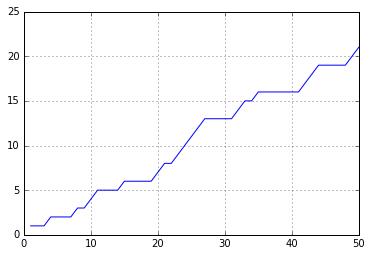

In [98]:
N = 50
coin = rnd.choice(['head', 'tail'], N)

# Calculate cumulative sum of heads
s = np.cumsum(coin == 'head')

# Index = how many times we have flipped the coin so far
i = np.arange(len(s)) + 1

# Make a graph of the cumulative sum of heads
plt.plot(i, s)
plt.grid()

It seems that the number of heads is increasing almost at the half rate of the number of flips (slope = 0.5). How about the propability of getting heads? We can calculate that by dividing the number of heads by the number the coin has been flipped  so far. This is your next exercise.

### Exercise 6. Probability of getting head in coin flipping

Flip the coin 1000 times and calculate the cumulative sum of the results. Create a second array, which contains the information how many times the coin has been flipped so far. Divide these two arrays to get the probability of heads over the number of flippings. Make a graph how the probability is changing when the number of flippings increases.

How many times do you need to flip the coin before the probability stabilizes around the value of 0.5?

### Exercise 7. Repeating the probability run (*)

Repeat the previous exercise several times, for example, 50 times. Make a graph where all repetitions are plotted overlayed each other. How does that spaghetti looks like? How many times we need to flip the coin before we can say that the probability is about 0.5 to get the head?

## Averaging random numbers

In this exercise we continue flipping the coin. Now we want to calculate the average value of heads. For this exercise you need the code from previous ones.

Let's assume that you have repeated the 100 coin flipping experiment 10 times and got the following numbers of heads on each run.

In [99]:
s = [ 55,  56,  45,  51,  52,  52,  52,  55,  51,  56]

### Exercise 8. Average and standard deviation

What are the average and standard deviation of these numbers?

Tip: Search help for `np.mean` and `np.std`.

### Exercise 9. Average and standard deviation of flipping the coin (*)

Use the code of exercise 4 here again. Change and explore the number of coin flippings and repetion times. Make histograms and calculate the average and standard deviations of each simulation.

How do the average and standard deviation depend on the number of coin flippings and repetition times?